# TASK #1: PROJECT OVERVIEW/UNDERSTAND THE PROBLEM STATEMENT AND BUSINESS CASE:



In [1]:
%cd /content/drive/My Drive/Happiness_report

/content/drive/My Drive/Happiness_report


In [66]:
# Get the required dependencies

! pip install bubbly

  Created wheel for bubbly: filename=bubbly-1.0.2-cp36-none-any.whl size=5429 sha256=20b1af35b82e6c33eae9dded51dbc38df81b4fd19c45603a334fe77f297fb57e
  Stored in directory: /root/.cache/pip/wheels/cf/3c/75/8c09dbf7cd6b320b69a6bc679fd111abd1139866c722b1476b
Successfully built bubbly


# TASK #2: IMPORT DATASETS AND LIBRARIES:

In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import zipfile
import cv2
import tensorflow as tf
from tensorflow.python.keras import Sequential
from tensorflow.keras import layers, optimizers
from tensorflow.keras.applications.resnet50 import ResNet50
from tensorflow.keras.layers import Input, Add, Dense, Activation, ZeroPadding2D, BatchNormalization, Flatten, Conv2D, AveragePooling2D, MaxPooling2D, Dropout
from tensorflow.keras.models import Model, load_model
from tensorflow.keras.initializers import glorot_uniform
from tensorflow.keras.utils import plot_model
from tensorflow.keras.callbacks import ReduceLROnPlateau, EarlyStopping, ModelCheckpoint, LearningRateScheduler
from IPython.display import display
from tensorflow.keras import backend as K
from sklearn.preprocessing import StandardScaler, normalize
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score
from sklearn.manifold import TSNE
from sklearn.metrics.pairwise import cosine_similarity
import plotly.express as px
import plotly.graph_objects as go

from google.colab import files #library to upload files to colab notebook
%matplotlib inline

In [4]:
#importing the csv files into pandas dataframes

df = pd.read_csv('happiness_report.csv')


In [5]:
#printing the first 5 rows of the dataframes

df.head()

,Overall rank,Country or region,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
0,1,Finland,7.769,1.340,1.587,0.986,0.596,0.153,0.393
1,2,Denmark,7.600,1.383,1.573,0.996,0.592,0.252,0.410
2,3,Norway,7.554,1.488,1.582,1.028,0.603,0.271,0.341
3,4,Iceland,7.494,1.380,1.624,1.026,0.591,0.354,0.118
4,5,Netherlands,7.488,1.396,1.522,0.999,0.557,0.322,0.298


# MINI TASK 1:

- Find the length of the dataframe

# TASK #3: PERFORM EXPLORATORY DATA ANALYSIS:

In [6]:
df.dtypes

Overall rank                      int64
Country or region                object
Score                           float64
GDP per capita                  float64
Social support                  float64
Healthy life expectancy         float64
Freedom to make life choices    float64
Generosity                      float64
Perceptions of corruption       float64
dtype: object

In [7]:
#To check the number of non-null values in the dataframe

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 156 entries, 0 to 155
Data columns (total 9 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Overall rank                  156 non-null    int64  
 1   Country or region             156 non-null    object 
 2   Score                         156 non-null    float64
 3   GDP per capita                156 non-null    float64
 4   Social support                156 non-null    float64
 5   Healthy life expectancy       156 non-null    float64
 6   Freedom to make life choices  156 non-null    float64
 7   Generosity                    156 non-null    float64
 8   Perceptions of corruption     156 non-null    float64
dtypes: float64(7), int64(1), object(1)
memory usage: 11.1+ KB


In [8]:
df.isnull().sum()

Overall rank                    0
Country or region               0
Score                           0
GDP per capita                  0
Social support                  0
Healthy life expectancy         0
Freedom to make life choices    0
Generosity                      0
Perceptions of corruption       0
dtype: int64

In [9]:
#Statistic summary of the dataframe

df.describe()

,Overall rank,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
count,156.000000,156.000000,156.000000,156.000000,156.000000,156.000000,156.000000,156.000000
mean,78.500000,5.407096,0.905147,1.208814,0.725244,0.392571,0.184846,0.110603
std,45.177428,1.113120,0.398389,0.299191,0.242124,0.143289,0.095254,0.094538
min,1.000000,2.853000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,39.750000,4.544500,0.602750,1.055750,0.547750,0.308000,0.108750,0.047000
50%,78.500000,5.379500,0.960000,1.271500,0.789000,0.417000,0.177500,0.085500
75%,117.250000,6.184500,1.232500,1.452500,0.881750,0.507250,0.248250,0.141250
max,156.000000,7.769000,1.684000,1.624000,1.141000,0.631000,0.566000,0.453000


In [10]:
#check the number of duplicated entries in the dataframe

df.duplicated().sum()

#since there are no duplicates, we need not remove them

0

In [11]:
# Get the correlation matrix

corr_matrix = df.corr()
corr_matrix

,Overall rank,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
Overall rank,1.000000,-0.989096,-0.801947,-0.767465,-0.787411,-0.546606,-0.047993,-0.351959
Score,-0.989096,1.000000,0.793883,0.777058,0.779883,0.566742,0.075824,0.385613
GDP per capita,-0.801947,0.793883,1.000000,0.754906,0.835462,0.379079,-0.079662,0.298920
Social support,-0.767465,0.777058,0.754906,1.000000,0.719009,0.447333,-0.048126,0.181899
Healthy life expectancy,-0.787411,0.779883,0.835462,0.719009,1.000000,0.390395,-0.029511,0.295283
Freedom to make life choices,-0.546606,0.566742,0.379079,0.447333,0.390395,1.000000,0.269742,0.438843
Generosity,-0.047993,0.075824,-0.079662,-0.048126,-0.029511,0.269742,1.000000,0.326538
Perceptions of corruption,-0.351959,0.385613,0.298920,0.181899,0.295283,0.438843,0.326538,1.000000


# MINI TASK 2:

- Find the minimum score in the dataframe

# TASK #4: PERFORM DATA VISUALIZATION:

<Figure size 1440x1440 with 0 Axes>

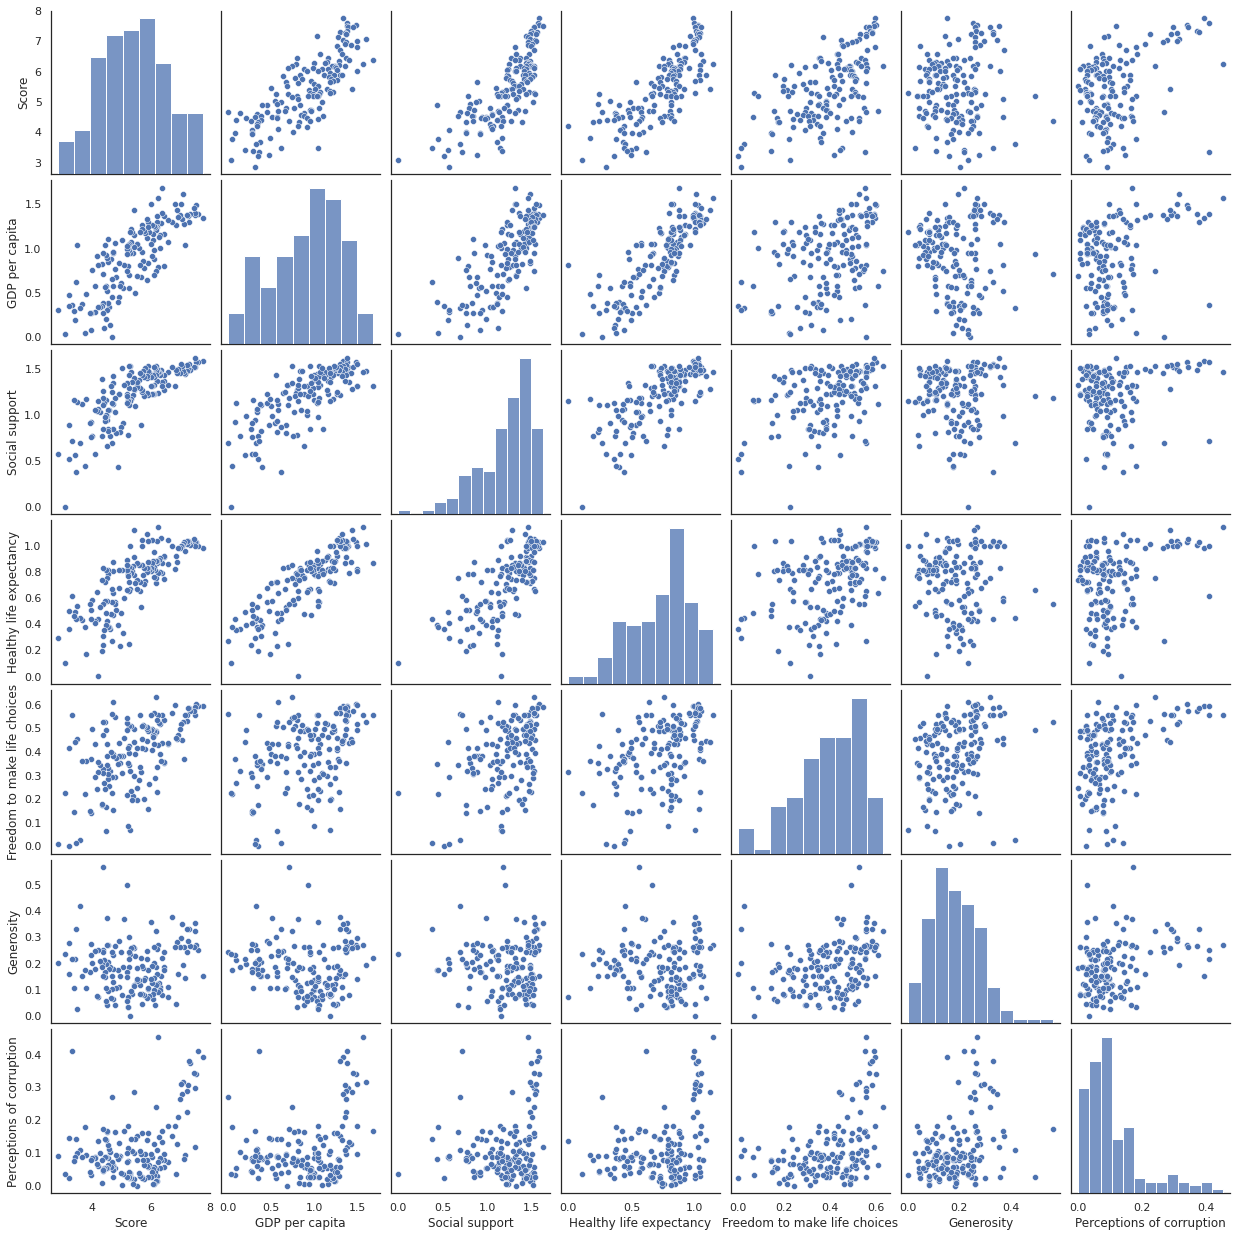

In [13]:
# Plot the pair plot

fig = plt.figure(figsize=(20,20))
sns.set(style="white",font_scale=1);
sns.pairplot(df[['Score','GDP per capita', 'Social support', 'Healthy life expectancy', 
    'Freedom to make life choices', 'Generosity',
       'Perceptions of corruption']])

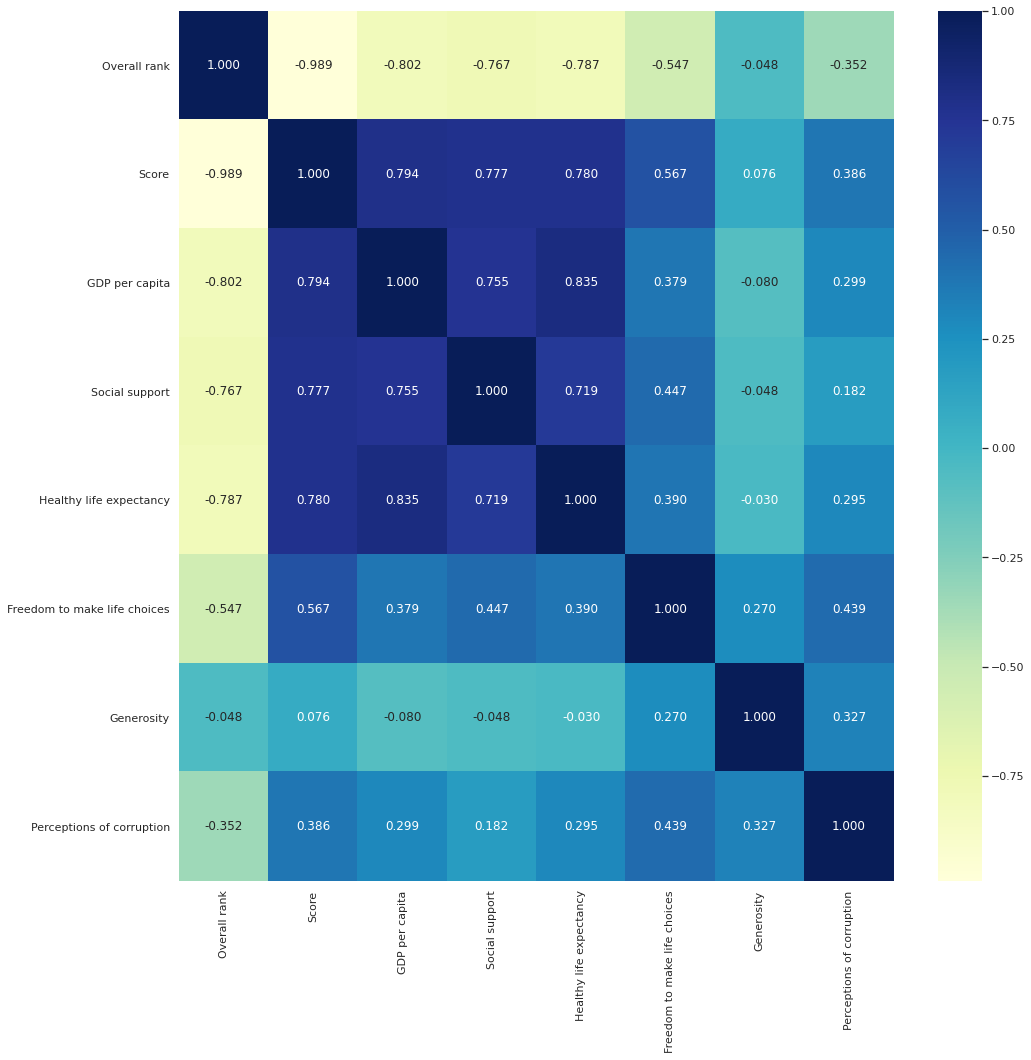

In [14]:
# Plot the correlation matrix

plt.figure(figsize = (16,16))
sns.heatmap(corr_matrix, annot = True, fmt = ".3f", cmap="YlGnBu", xticklabels= corr_matrix.columns.values, yticklabels= corr_matrix.columns.values)
plt.show()

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).

/usr/local/lib/python3.6/dist-packages/seaborn/di

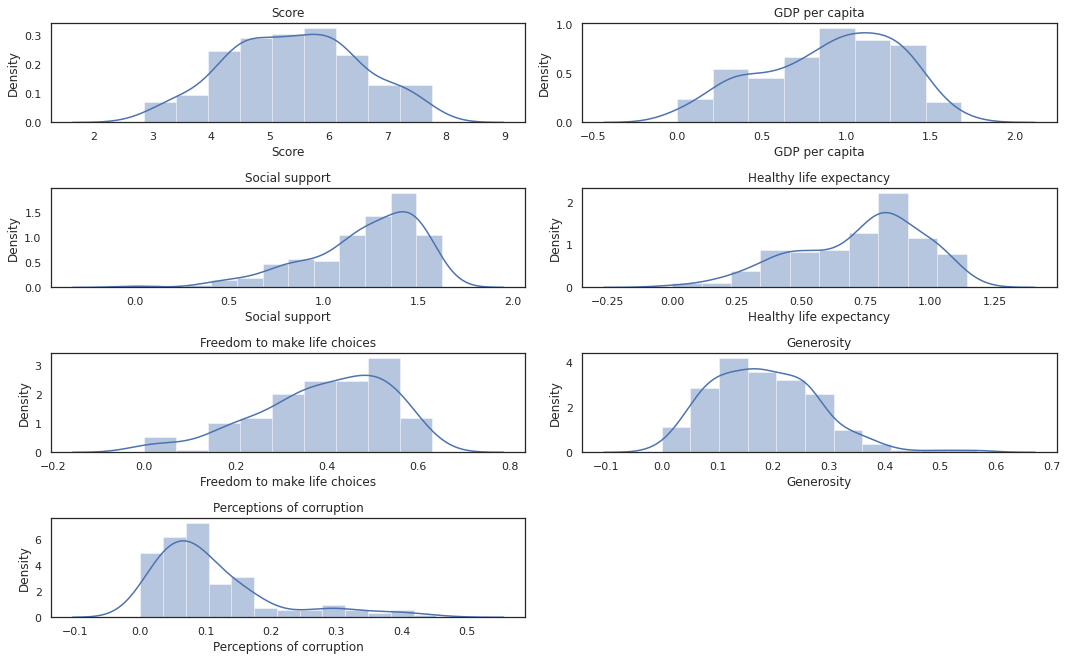

In [15]:
#distplot combines the matplotlib.hist function with seaborn kdeplot()
columns = ['Score','GDP per capita', 'Social support', 'Healthy life expectancy', 
    'Freedom to make life choices', 'Generosity',
       'Perceptions of corruption']
plt.figure(figsize=(15,18))
for i in range(len(columns)):
  plt.subplot(8,2,i+1)
  sns.distplot(df[columns[i]])
  plt.title(columns[i])

plt.tight_layout()

In [17]:
# Plot the relation ship between score, gdp and region

fig = px.scatter(df, x='Score', y='GDP per capita', text='Country or region')
fig.update_traces(textposition='top center')
fig.update_layout(
    height=1000,
)
fig.show()

# MINI TASK 3:

- Plot the similar type of plot for 'Healthy life expectancy' and 'Score'

In [37]:
# Plot the relationship between score and gdp

fig = px.scatter(df, x="GDP per capita", y="Score",
           size='Overall rank', color="Country or region", hover_name="Country or region",
          trendline= "ols")

fig.update_layout(
    title_text='Happiness Score vs GDP per Capita'
)
fig.show()

In [41]:
# Plot the relationship between score and healthy life expectancy

fig = px.scatter(df, x='Healthy life expectancy', y="Score",
           size='Overall rank', color="Country or region", hover_name="Country or region",
          trendline= "ols")

fig.update_layout(
    title_text='Happiness Score vs Healthy life expectancy'
)
fig.show()

In [40]:
# Plot the relationship between score and freedom to make life choices

fig = px.scatter(df, x='Freedom to make life choices', y="Score",
           size='Overall rank', color="Country or region", hover_name="Country or region",
          trendline= "ols")

fig.update_layout(
    title_text='Happiness Score vs Freedom to make life choices'
)
fig.show()

In [39]:
# Plot the relationship between score and generocity

fig = px.scatter(df, x='Generosity', y="Score",
           size='Overall rank', color="Country or region", hover_name="Country or region",
          trendline= "ols")

fig.update_layout(
    title_text='Happiness Score vs Generocity'
)
fig.show()

In [38]:
# Plot the relationship between score and perception of corruption

fig = px.scatter(df, x='Perceptions of corruption', y="Score",
           size='Overall rank', color="Country or region", hover_name="Country or region",
          trendline= "ols")

fig.update_layout(
    title_text='Happiness Score vs Perception of corruption'
)
fig.show()

In [42]:
# Plot the happiness score based on geography

data = dict(type = 'choropleth', 
           locations = df["Country or region"],
           locationmode = 'country names',
           colorscale='RdYlGn',
           z = df['Score'], 
           text = df["Country or region"],
           colorbar = {'title':'Happiness'})

layout = dict(title = 'Geographical Visualization of Happiness Score ', 
              geo = dict(showframe = True, projection = {'type': 'azimuthal equal area'}))

choromap3 = go.Figure(data = [data], layout=layout)
iplot(choromap3)

# MINI TASK 4:

- Plot the similar type of geographical plot for 'Perceptions of corruption'


# TASK #5: PREPARE THE DATA TO FEED THE CLUSTERING MODEL:

## We are going to create clusters without the use of happiness score and rank to see which countries fall under similar clusters

In [44]:
# Selecting the data without rank and happiness score
df_seg = df.drop(columns = ['Overall rank', 'Country or region','Score'])
df_seg

,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
0,1.340,1.587,0.986,0.596,0.153,0.393
1,1.383,1.573,0.996,0.592,0.252,0.410
2,1.488,1.582,1.028,0.603,0.271,0.341
3,1.380,1.624,1.026,0.591,0.354,0.118
4,1.396,1.522,0.999,0.557,0.322,0.298
...,...,...,...,...,...,...
151,0.359,0.711,0.614,0.555,0.217,0.411
152,0.476,0.885,0.499,0.417,0.276,0.147
153,0.350,0.517,0.361,0.000,0.158,0.025
154,0.026,0.000,0.105,0.225,0.235,0.035


In [45]:
# Scale the data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df_seg)


In [46]:
scaled_data.shape

(156, 6)

# TASK #6: CLUSTERING USING KMEANS:

## Finding the cluster based on elbow method:

The elbow method is a heuristic method of interpretation and validation of consistency within cluster analysis designed to help find the appropriate number of clusters in a dataset. If the line chart looks like an arm, then the "elbow" on the arm is the value of k that is the best.

Source: 
- https://en.wikipedia.org/wiki/Elbow_method_(clustering)
- https://www.geeksforgeeks.org/elbow-method-for-optimal-value-of-k-in-kmeans/

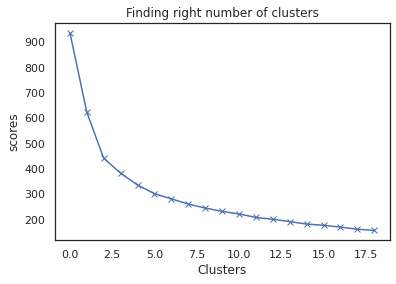

In [47]:
scores = []

range_values = range(1,20)

for i in range_values:
  kmeans = KMeans(n_clusters= i)
  kmeans.fit(scaled_data)
  scores.append(kmeans.inertia_)

plt.plot(scores, 'bx-')
plt.title('Finding right number of clusters')
plt.xlabel('Clusters')
plt.ylabel('scores') 
plt.show()

From this we can observe that, 3rd cluster seems to be forming the elbow of the curve. 

In [48]:
# Clustering based on kmeans

kmeans = KMeans(3)
kmeans.fit(scaled_data)
labels = kmeans.labels_
y_kmeans = kmeans.fit_predict(scaled_data)

In [49]:
df_cluster = pd.concat([df, pd.DataFrame({'cluster':labels})], axis = 1)
df_cluster.head()

,Overall rank,Country or region,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,cluster
0,1,Finland,7.769,1.340,1.587,0.986,0.596,0.153,0.393,1
1,2,Denmark,7.600,1.383,1.573,0.996,0.592,0.252,0.410,1
2,3,Norway,7.554,1.488,1.582,1.028,0.603,0.271,0.341,1
3,4,Iceland,7.494,1.380,1.624,1.026,0.591,0.354,0.118,1
4,5,Netherlands,7.488,1.396,1.522,0.999,0.557,0.322,0.298,1


# MINI TASK 5:

- Try the same model with 4 clusters 


# TASK #7: VISUALIZING THE CLUSTERS:

In [59]:
# Plot the relationship between cluster and score 

fig = px.scatter(df_cluster, x='cluster', y="Score",
           size='Overall rank', color="Country or region", hover_name="Country or region",
          trendline= "ols")

fig.update_layout(
    title_text='Happiness Score vs Cluster'
)
fig.show()

In [62]:
# Plot the relationship between cluster and GDP

fig = px.scatter(df_cluster, x='cluster', y='GDP per capita',
           size='Overall rank', color="Country or region", hover_name="Country or region",
          trendline= "ols")

fig.update_layout(
    title_text='GDP vs Clusters'
)
fig.show()

In [63]:
# Plot the relationship between cluster and generosity

fig = px.scatter(df_cluster, x='cluster', y='Generosity',
           size='Overall rank', color="Country or region", hover_name="Country or region",
          trendline= "ols")

fig.update_layout(
    title_text='Generocity vs Clusters'
)
fig.show()

In [64]:
# Plot the relationship between cluster and perception of corruption

fig = px.scatter(df_cluster, x='cluster', y='Perceptions of corruption',
           size='Overall rank', color="Country or region", hover_name="Country or region",
          trendline= "ols")

fig.update_layout(
    title_text='Perceptions of corruption vs Clusters'
)
fig.show()

In [74]:
# Visaulizing the clusters with respect to economy, corruption, gdp ,rank and their scores

from bubbly.bubbly import bubbleplot

figure = bubbleplot(dataset=df_cluster, 
    x_column='GDP per capita', y_column='Perceptions of corruption', bubble_column='Country or region',  
    color_column='cluster', z_column='Healthy life expectancy', size_column='Score',
    x_title="GDP per capita", y_title="Corruption", z_title="Life Expectancy",
    title='Clusters based Impact of Economy, Corruption and Life expectancy on Happiness Scores of Nations',
    colorbar_title='Cluster', marker_opacity=1, colorscale='Portland',
    scale_bubble=0.8, height=650)

iplot(figure, config={'scrollzoom': True})

/usr/local/lib/python3.6/dist-packages/plotly/offline/offline.py:159: UserWarning:


Unrecognized config options supplied: ['scrollzoom']



# MINI TASK 6:

- Plot the similar type of visualization having ' Generosity' instead of 'Healthy life expectancy'


In [78]:
# Visualizing the clusters geographically

data = dict(type = 'choropleth', 
           locations = df_cluster["Country or region"],
           locationmode = 'country names',
           colorscale='RdYlGn',
           z = df_cluster['cluster'], 
           text = df_cluster["Country or region"],
           colorbar = {'title':'Clusters'})

layout = dict(title = 'Geographical Visualization of Clusters', 
              geo = dict(showframe = True, projection = {'type': 'azimuthal equal area'}))

choromap3 = go.Figure(data = [data], layout=layout)
iplot(choromap3)

# CONGRADUALTIONS ON COMPLETING THE PROJECT !

# MINI TASK SOLUTION 1:

- Find the length of the dataframe

```python
len(df)
```

# MINI TASK SOLUTION 2:

- Find the minimum score in the dataframe

```python
df['Score'].min()
```

# MINI TASK SOLUTION 3:

- Plot the similar type of plot for 'Healthy life expectancy' and 'Score'

```python
# Plot the relation ship between score, gdp and region

fig = px.scatter(df, x='Score', y='Healthy life expectancy', text='Country or region')
fig.update_traces(textposition='top center')
fig.update_layout(
    height=1000,
)
fig.show()
```

# MINI TASK SOLUTION 4:

- Plot the similar type of geographical plot for 'Perceptions of corruption'

```python
data = dict(type = 'choropleth', 
           locations = df["Country or region"],
           locationmode = 'country names',
           colorscale='RdYlGn',
           z = df['Perceptions of corruption'], 
           text = df["Country or region"],
           colorbar = {'title':'Happiness'})

layout = dict(title = 'Geographical Visualization ', 
              geo = dict(showframe = True, projection = {'type': 'azimuthal equal area'}))

choromap3 = go.Figure(data = [data], layout=layout)
iplot(choromap3)
```

# MINI TASK SOLUTION 5:

- Try the same model with 4 clusters 

```python
kmeans = KMeans(4)
kmeans.fit(scaled_data)
labels = kmeans.labels_
y_kmeans = kmeans.fit_predict(scaled_data)
```

# MINI TASK SOLUTION 6:

- Plot the similar type of visualization having ' Generosity' instead of 'Healthy life expectancy'

```python
# Visaulizing the clusters with respect to economy, corruption, gdp ,rank and their scores

from bubbly.bubbly import bubbleplot

figure = bubbleplot(dataset=df_cluster, 
    x_column='GDP per capita', y_column='Perceptions of corruption', bubble_column='Country or region',  
    color_column='cluster', z_column='Generocity', size_column='Score',
    x_title="GDP per capita", y_title="Corruption", z_title="Life Expectancy",
    title='Clusters based Impact of Economy, Corruption and Generocity on Happiness Scores of Nations',
    colorbar_title='Cluster', marker_opacity=1, colorscale='Portland',
    scale_bubble=0.8, height=650)

iplot(figure, config={'scrollzoom': True})
```